In [1]:
# Import Libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
import os
os.environ["OMP_NUM_THREADS"] = "1"

# Exploratory Data Analysis

In [2]:
# Import the Dataset

pb = pd.read_csv("segmentation data.csv")

In [3]:
# Explore pb

pb.head(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
0,100000001,0,0,67,2,124670,1,2
1,100000002,1,1,22,1,150773,1,2
2,100000003,0,0,49,1,89210,0,0
3,100000004,0,0,45,1,171565,1,1
4,100000005,0,0,53,1,149031,1,1
5,100000006,0,0,35,1,144848,0,0
6,100000007,0,0,53,1,156495,1,1
7,100000008,0,0,35,1,193621,2,1
8,100000009,0,1,61,2,151591,0,0
9,100000010,0,1,28,1,174646,2,0


In [4]:
# Explore pb

pb.tail(10)

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
1990,100001991,1,1,31,1,78758,0,0
1991,100001992,0,0,54,1,128537,1,0
1992,100001993,1,0,51,1,101074,0,0
1993,100001994,1,0,38,1,87670,0,0
1994,100001995,0,0,45,1,113414,1,0
1995,100001996,1,0,47,1,123525,0,0
1996,100001997,1,1,27,1,117744,1,0
1997,100001998,0,0,31,0,86400,0,0
1998,100001999,1,1,24,1,97968,0,0
1999,100002000,0,0,25,0,68416,0,0


In [5]:
# Explore pb

pb.shape

(2000, 8)

In [6]:
# Explore pb

pb.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size
count,2.000000e+03,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000
mean,1.000010e+08,0.457000,0.496500,35.909000,1.03800,120954.419000,0.810500,0.739000
std,5.774946e+02,0.498272,0.500113,11.719402,0.59978,38108.824679,0.638587,0.812533
min,1.000000e+08,0.000000,0.000000,18.000000,0.00000,35832.000000,0.000000,0.000000
25%,1.000005e+08,0.000000,0.000000,27.000000,1.00000,97663.250000,0.000000,0.000000
50%,1.000010e+08,0.000000,0.000000,33.000000,1.00000,115548.500000,1.000000,1.000000
75%,1.000015e+08,1.000000,1.000000,42.000000,1.00000,138072.250000,1.000000,1.000000
max,1.000020e+08,1.000000,1.000000,76.000000,3.00000,309364.000000,2.000000,2.000000


In [7]:
# Explore pb

pb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   ID               2000 non-null   int64
 1   Sex              2000 non-null   int64
 2   Marital status   2000 non-null   int64
 3   Age              2000 non-null   int64
 4   Education        2000 non-null   int64
 5   Income           2000 non-null   int64
 6   Occupation       2000 non-null   int64
 7   Settlement size  2000 non-null   int64
dtypes: int64(8)
memory usage: 125.1 KB


In [8]:
# Check for Missing Values

pb.isnull().sum()

ID                 0
Sex                0
Marital status     0
Age                0
Education          0
Income             0
Occupation         0
Settlement size    0
dtype: int64

<Axes: xlabel='Settlement size', ylabel='count'>

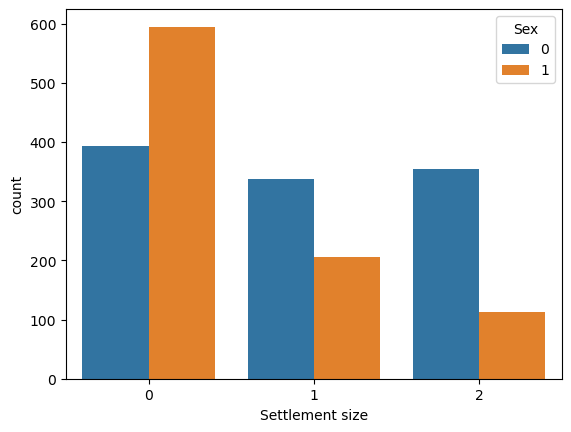

In [9]:
# Visualise Distribution of Settlement size by Sex

sns.countplot(x="Settlement size", hue="Sex", data=pb)

<Axes: xlabel='Settlement size', ylabel='count'>

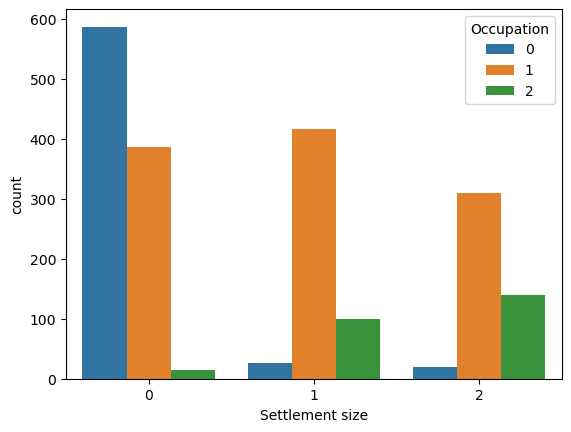

In [10]:
# Visualise Distribution of Settlement size by Occupation

sns.countplot(x="Settlement size", hue="Occupation", data=pb)

<Axes: xlabel='Sex', ylabel='count'>

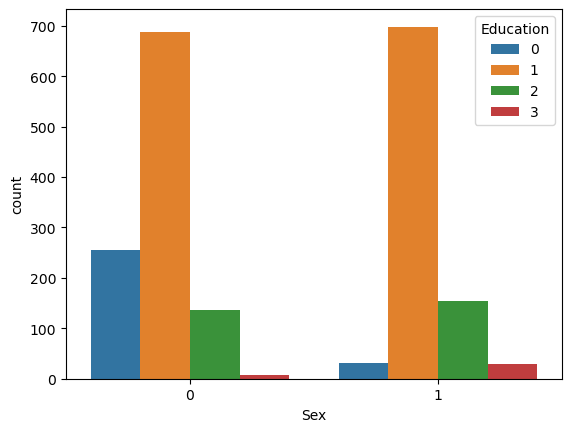

In [11]:
# Visualise Distribution of Sex by Education

sns.countplot(x="Sex", hue="Education", data=pb)

<Axes: xlabel='Marital status', ylabel='count'>

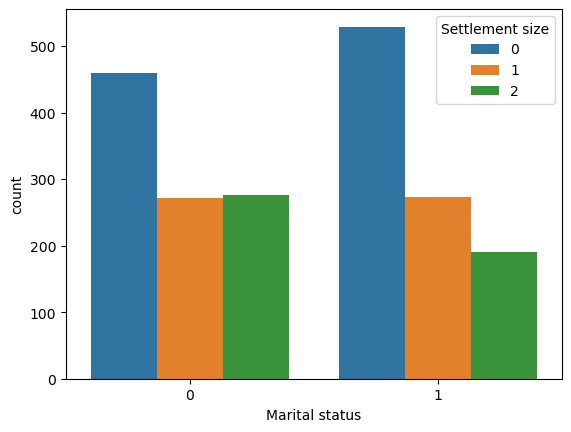

In [12]:
# Visualise Distribution of Marital status by Settlement size

sns.countplot(x="Marital status", hue="Settlement size", data=pb)

<Axes: xlabel='Marital status', ylabel='count'>

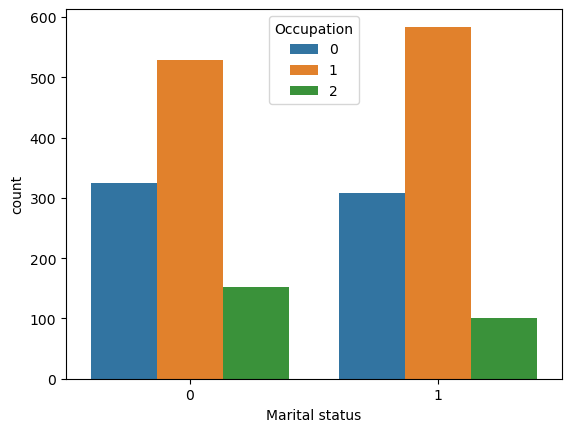

In [13]:
# Visualise Distribution of Marital status by Occupation

sns.countplot(x="Marital status", hue="Occupation", data=pb)

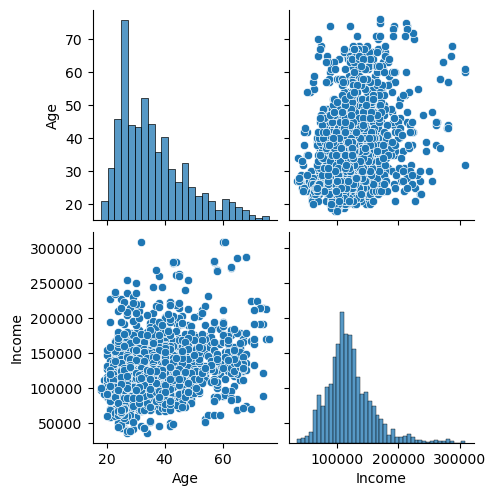

In [14]:
# Explore pb

# Plot Pairplot of Age and Income

sns.pairplot(pb.iloc[:,[3,5]])

# Standardise pb

In [15]:
# Standardise pb Using Standard Scaler

x = pb.iloc[:,[3,5]].values
sc = StandardScaler()
x = sc.fit_transform(x)

# Cluster pb using K-Means

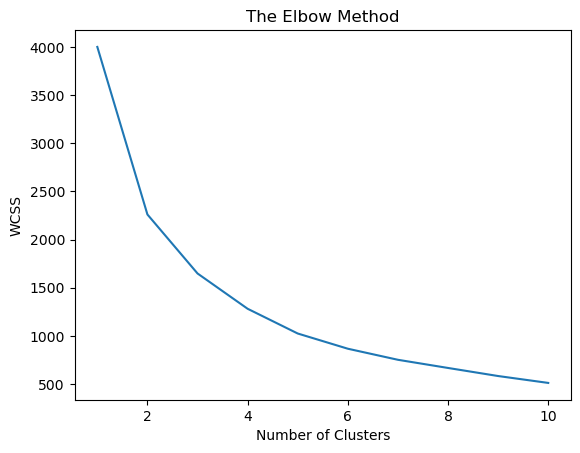

In [16]:
# Use Elbow Method to Determine Ideal Cluster Number

wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters = i, init = "k-means++",n_init = 10, random_state = 10)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title("The Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("WCSS")
plt.show()

In [17]:
# Fit K-Means Model into Dataset

kmeans = KMeans(n_clusters = 5, init = "k-means++",n_init =5, random_state = 10)
y_kmeans = kmeans.fit_predict(x)

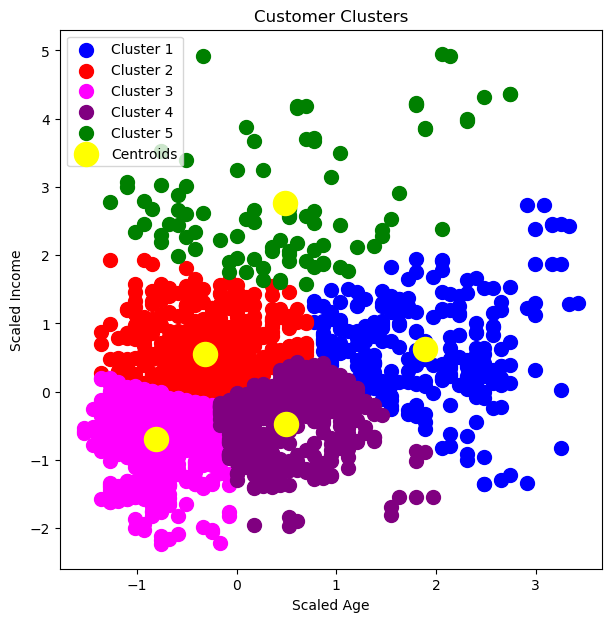

In [18]:
# Visualise Clusters

plt.figure(figsize=(7,7))
plt.scatter(x[y_kmeans == 0,0], x[y_kmeans == 0,1], s = 100, c = "blue", label = "Cluster 1")
plt.scatter(x[y_kmeans == 1,0], x[y_kmeans == 1,1], s = 100, c = "red", label = "Cluster 2")
plt.scatter(x[y_kmeans == 2,0], x[y_kmeans == 2,1], s = 100, c = "magenta", label = "Cluster 3")
plt.scatter(x[y_kmeans == 3,0], x[y_kmeans == 3,1], s = 100, c = "purple", label = "Cluster 4")
plt.scatter(x[y_kmeans == 4,0], x[y_kmeans == 4,1], s = 100, c = "green", label = "Cluster 5")
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c="yellow", label = "Centroids")
plt.title("Customer Clusters")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.legend()
plt.show()

# Analyse Results of KMeans Clustering


In [19]:
pb["Kclusters"] = y_kmeans
pb

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Kclusters
0,100000001,0,0,67,2,124670,1,2,0
1,100000002,1,1,22,1,150773,1,2,1
2,100000003,0,0,49,1,89210,0,0,3
3,100000004,0,0,45,1,171565,1,1,0
4,100000005,0,0,53,1,149031,1,1,0
...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,3
1996,100001997,1,1,27,1,117744,1,0,2
1997,100001998,0,0,31,0,86400,0,0,2
1998,100001999,1,1,24,1,97968,0,0,2


In [20]:
pb["Kclusters"].unique()

array([0, 1, 3, 4, 2])

<Axes: xlabel='Kclusters', ylabel='count'>

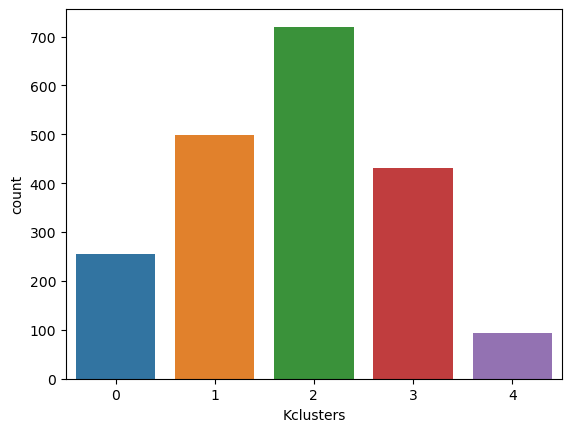

In [21]:
sns.countplot(pb, x = "Kclusters")

In [22]:
# Silhouette Score

silhouette_score(x,y_kmeans)

0.36476909818819014

In [23]:
pbkzero = pb[pb["Kclusters"] == 0]
pbkzero.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Kclusters
count,2.560000e+02,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.000000,256.0
mean,1.000009e+08,0.351562,0.425781,57.992188,1.824219,144778.519531,0.984375,1.039062,0.0
std,4.466866e+02,0.478393,0.495429,7.455485,0.584405,27813.440769,0.606945,0.765966,0.0
min,1.000000e+08,0.000000,0.000000,45.000000,1.000000,69487.000000,0.000000,0.000000,0.0
25%,1.000005e+08,0.000000,0.000000,52.000000,1.000000,126487.500000,1.000000,0.000000,0.0
50%,1.000010e+08,0.000000,0.000000,57.000000,2.000000,142917.000000,1.000000,1.000000,0.0
75%,1.000011e+08,1.000000,1.000000,64.000000,2.000000,164159.000000,1.000000,2.000000,0.0
max,1.000020e+08,1.000000,1.000000,76.000000,3.000000,224998.000000,2.000000,2.000000,0.0


In [24]:
pbkzero["Sex"].value_counts()

0    166
1     90
Name: Sex, dtype: int64

In [25]:
pbkzero["Marital status"].value_counts()

0    147
1    109
Name: Marital status, dtype: int64

In [26]:
pbkzero["Occupation"].value_counts()

1    162
0     49
2     45
Name: Occupation, dtype: int64

In [27]:
pbkone = pb[pb["Kclusters"] == 1]
pbkone.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Kclusters
count,4.990000e+02,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.000000,499.0
mean,1.000008e+08,0.376754,0.492986,32.152305,0.881764,142274.697395,1.166333,1.056112,1.0
std,5.207007e+02,0.485059,0.500453,5.269528,0.541499,17354.144179,0.543664,0.797119,0.0
min,1.000000e+08,0.000000,0.000000,20.000000,0.000000,115403.000000,0.000000,0.000000,1.0
25%,1.000004e+08,0.000000,0.000000,28.000000,1.000000,127636.000000,1.000000,0.000000,1.0
50%,1.000008e+08,0.000000,0.000000,32.000000,1.000000,139414.000000,1.000000,1.000000,1.0
75%,1.000012e+08,1.000000,1.000000,36.000000,1.000000,153562.500000,1.000000,2.000000,1.0
max,1.000020e+08,1.000000,1.000000,44.000000,3.000000,194728.000000,2.000000,2.000000,1.0


In [28]:
pbkone["Sex"].value_counts()

0    311
1    188
Name: Sex, dtype: int64

In [29]:
pbkone["Marital status"].value_counts()

0    253
1    246
Name: Marital status, dtype: int64

In [30]:
pbkone["Occupation"].value_counts()

1    338
2    122
0     39
Name: Occupation, dtype: int64

In [31]:
pbktwo = pb[pb["Kclusters"] == 2]
pbktwo.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Kclusters
count,7.200000e+02,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.000000,720.0
mean,1.000011e+08,0.619444,0.659722,26.440278,0.756944,94607.169444,0.573611,0.473611,2.0
std,6.070405e+02,0.485861,0.474132,3.649725,0.429227,18590.352413,0.524900,0.722669,0.0
min,1.000000e+08,0.000000,0.000000,18.000000,0.000000,35832.000000,0.000000,0.000000,2.0
25%,1.000006e+08,0.000000,0.000000,24.000000,1.000000,83317.750000,0.000000,0.000000,2.0
50%,1.000013e+08,1.000000,1.000000,26.000000,1.000000,99109.500000,1.000000,0.000000,2.0
75%,1.000017e+08,1.000000,1.000000,29.000000,1.000000,108566.250000,1.000000,1.000000,2.0
max,1.000020e+08,1.000000,1.000000,35.000000,1.000000,128678.000000,2.000000,2.000000,2.0


In [32]:
pbktwo["Sex"].value_counts()

1    446
0    274
Name: Sex, dtype: int64

In [33]:
pbktwo["Marital status"].value_counts()

1    475
0    245
Name: Marital status, dtype: int64

In [34]:
pbktwo["Occupation"].value_counts()

1    391
0    318
2     11
Name: Occupation, dtype: int64

In [35]:
pbkthree = pb[pb["Kclusters"] == 3]
pbkthree.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Kclusters
count,4.310000e+02,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.000000,431.0
mean,1.000011e+08,0.394432,0.303944,41.721578,1.185615,103113.422274,0.484919,0.459397,3.0
std,5.963213e+02,0.489296,0.460493,5.149077,0.389247,18489.221116,0.523077,0.723428,0.0
min,1.000000e+08,0.000000,0.000000,34.000000,1.000000,46109.000000,0.000000,0.000000,3.0
25%,1.000006e+08,0.000000,0.000000,38.000000,1.000000,89153.500000,0.000000,0.000000,3.0
50%,1.000012e+08,0.000000,0.000000,41.000000,1.000000,107099.000000,0.000000,0.000000,3.0
75%,1.000017e+08,1.000000,1.000000,46.000000,1.000000,116082.000000,1.000000,1.000000,3.0
max,1.000020e+08,1.000000,1.000000,59.000000,2.000000,137689.000000,2.000000,2.000000,3.0


In [36]:
pbkthree["Sex"].value_counts()

0    261
1    170
Name: Sex, dtype: int64

In [37]:
pbkthree["Marital status"].value_counts()

0    300
1    131
Name: Marital status, dtype: int64

In [38]:
pbkthree["Occupation"].value_counts()

0    227
1    199
2      5
Name: Occupation, dtype: int64

In [39]:
pbkfour = pb[pb["Kclusters"] == 4]
pbkfour.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Kclusters
count,9.400000e+01,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.000000,94.0
mean,1.000006e+08,0.212766,0.340426,41.585106,1.202128,226504.425532,1.755319,1.553191,4.0
std,3.472082e+02,0.411458,0.476393,11.140751,0.727047,33445.114162,0.432203,0.597792,0.0
min,1.000000e+08,0.000000,0.000000,21.000000,0.000000,181262.000000,1.000000,0.000000,4.0
25%,1.000003e+08,0.000000,0.000000,32.500000,1.000000,200879.750000,2.000000,1.000000,4.0
50%,1.000007e+08,0.000000,0.000000,42.000000,1.000000,217550.500000,2.000000,2.000000,4.0
75%,1.000009e+08,0.000000,1.000000,46.750000,2.000000,248716.500000,2.000000,2.000000,4.0
max,1.000012e+08,1.000000,1.000000,68.000000,3.000000,309364.000000,2.000000,2.000000,4.0


In [40]:
pbkfour["Sex"].value_counts()

0    74
1    20
Name: Sex, dtype: int64

In [41]:
pbkfour["Marital status"].value_counts()

0    62
1    32
Name: Marital status, dtype: int64

In [42]:
pbkfour["Occupation"].value_counts()

2    71
1    23
Name: Occupation, dtype: int64

# Cluster pb using DBSCAN

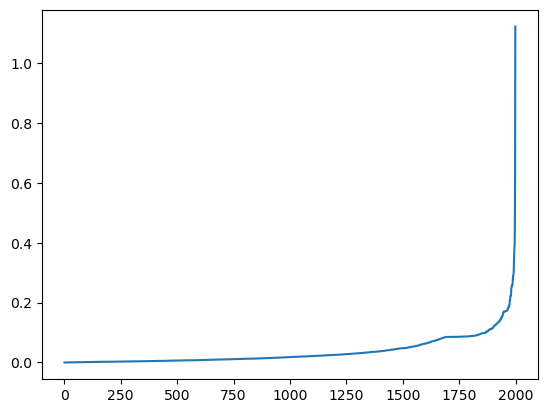

In [43]:
# Determine Epsilon Value for DBSCAN

neighbours = NearestNeighbors(n_neighbors = 2)
distances, indices = neighbours.fit(x).kneighbors(x)

distances = distances[:,1]
distances = np.sort(distances, axis = 0)
plt.plot(distances)

In [44]:
# Fit DBSCAN Model into Dataset

dbscan = DBSCAN(eps=0.25, min_samples = 5)
y_dbscan = dbscan.fit_predict(x)

In [45]:
# View Cluster Numbers

np.unique(y_dbscan)

array([-1,  0,  1,  2,  3,  4], dtype=int64)

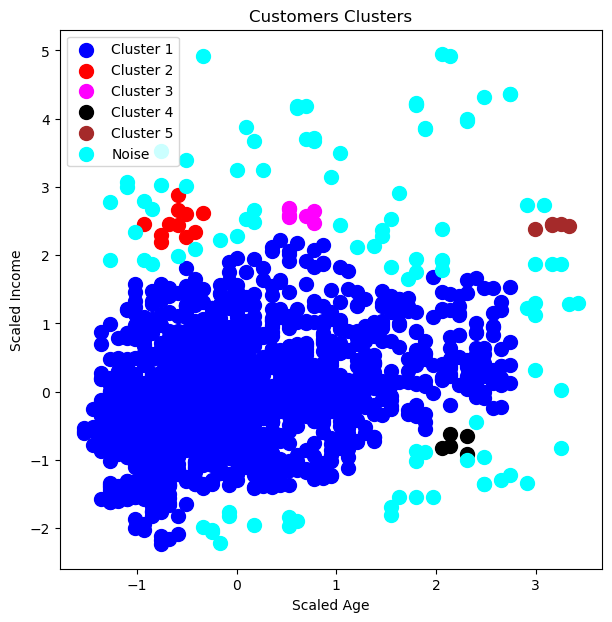

In [46]:
# Visualise Clusters

plt.figure(figsize = (7,7))
plt.scatter(x[y_dbscan==0,0], x[y_dbscan==0,1], s = 100, c = "blue", label = "Cluster 1")
plt.scatter(x[y_dbscan==1,0], x[y_dbscan==1,1], s = 100, c = "red", label = "Cluster 2")
plt.scatter(x[y_dbscan==2,0], x[y_dbscan==2,1], s = 100, c = "magenta", label = "Cluster 3")
plt.scatter(x[y_dbscan==3,0], x[y_dbscan==3,1], s = 100, c = "black", label = "Cluster 4")
plt.scatter(x[y_dbscan==4,0], x[y_dbscan==4,1], s = 100, c = "brown", label = "Cluster 5")
plt.scatter(x[y_dbscan==-1,0], x[y_dbscan==-1,1], s = 100, c = "cyan", label = "Noise")
plt.title("Customers Clusters")
plt.xlabel("Scaled Age")
plt.ylabel("Scaled Income")
plt.legend()
plt.show()

# Analyse Results of DBSCAN Clustering


In [47]:

pb["DBclusters"] = y_dbscan
pb

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Kclusters,DBclusters
0,100000001,0,0,67,2,124670,1,2,0,0
1,100000002,1,1,22,1,150773,1,2,1,0
2,100000003,0,0,49,1,89210,0,0,3,0
3,100000004,0,0,45,1,171565,1,1,0,0
4,100000005,0,0,53,1,149031,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...
1995,100001996,1,0,47,1,123525,0,0,3,0
1996,100001997,1,1,27,1,117744,1,0,2,0
1997,100001998,0,0,31,0,86400,0,0,2,0
1998,100001999,1,1,24,1,97968,0,0,2,0


<Axes: xlabel='DBclusters', ylabel='count'>

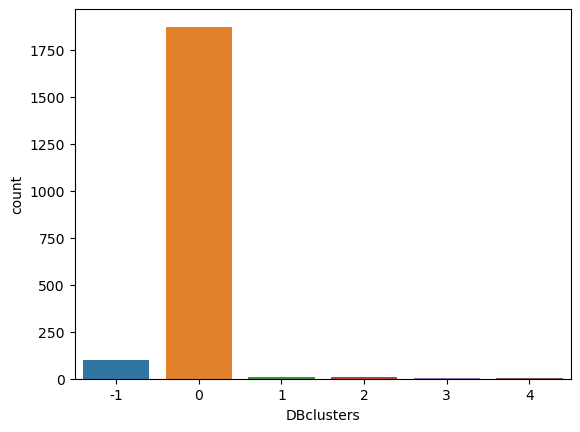

In [48]:
sns.countplot(pb, x = "DBclusters")

In [49]:
# Get Silhouette Score

silhouette_score(x,y_dbscan)

0.23164536226662966

In [50]:
pbdbzero = pb[pb["DBclusters"] == 0]
pbdbzero.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Kclusters,DBclusters
count,1.873000e+03,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.000000,1873.0
mean,1.000010e+08,0.460224,0.499199,35.003737,1.004271,116573.014949,0.778964,0.714362,1.753871,0.0
std,5.816028e+02,0.498548,0.500133,10.779377,0.564232,29349.234288,0.608211,0.805359,0.974442,0.0
min,1.000000e+08,0.000000,0.000000,18.000000,0.000000,35832.000000,0.000000,0.000000,0.000000,0.0
25%,1.000005e+08,0.000000,0.000000,27.000000,1.000000,97613.000000,0.000000,0.000000,1.000000,0.0
50%,1.000010e+08,0.000000,0.000000,33.000000,1.000000,114476.000000,1.000000,0.000000,2.000000,0.0
75%,1.000015e+08,1.000000,1.000000,41.000000,1.000000,134433.000000,1.000000,1.000000,2.000000,0.0
max,1.000020e+08,1.000000,1.000000,68.000000,3.000000,205476.000000,2.000000,2.000000,4.000000,0.0


In [51]:
pbdbzero["Sex"].value_counts()

0    1011
1     862
Name: Sex, dtype: int64

In [52]:
pbdbzero["Marital status"].value_counts()

0    938
1    935
Name: Marital status, dtype: int64

In [53]:
pbdbzero["Occupation"].value_counts()

1    1089
0     599
2     185
Name: Occupation, dtype: int64

In [54]:
pbdboutlier = pb[pb["DBclusters"] == -1]
pbdboutlier.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Kclusters,DBclusters
count,9.900000e+01,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.0
mean,1.000008e+08,0.434343,0.464646,50.131313,1.575758,183136.050505,1.222222,1.060606,2.535354,-1.0
std,4.601154e+02,0.498193,0.501287,15.725091,0.783645,81896.088823,0.875466,0.830763,1.745625,0.0
min,1.000000e+08,0.000000,0.000000,21.000000,0.000000,36760.000000,0.000000,0.000000,0.000000,-1.0
25%,1.000004e+08,0.000000,0.000000,36.500000,1.000000,88553.500000,0.000000,0.000000,0.000000,-1.0
50%,1.000008e+08,0.000000,0.000000,54.000000,2.000000,201656.000000,2.000000,1.000000,4.000000,-1.0
75%,1.000011e+08,1.000000,1.000000,63.000000,2.000000,244628.500000,2.000000,2.000000,4.000000,-1.0
max,1.000020e+08,1.000000,1.000000,76.000000,3.000000,309364.000000,2.000000,2.000000,4.000000,-1.0


In [55]:
pbdboutlier["Sex"].value_counts()

0    56
1    43
Name: Sex, dtype: int64

In [56]:
pbdboutlier["Marital status"].value_counts()

0    53
1    46
Name: Marital status, dtype: int64

In [57]:
pbdboutlier["Occupation"].value_counts()

2    51
0    29
1    19
Name: Occupation, dtype: int64

In [58]:
pbdbone = pb[pb["DBclusters"] == 1]
pbdbone.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Kclusters,DBclusters
count,1.100000e+01,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.0
mean,1.000005e+08,0.181818,0.363636,28.818182,0.545455,215259.272727,1.636364,1.727273,4.0,1.0
std,2.966651e+02,0.404520,0.504525,1.990888,0.934199,7750.776491,0.504525,0.646670,0.0,0.0
min,1.000001e+08,0.000000,0.000000,25.000000,0.000000,204723.000000,1.000000,0.000000,4.0,1.0
25%,1.000003e+08,0.000000,0.000000,27.500000,0.000000,209231.500000,1.000000,2.000000,4.0,1.0
50%,1.000004e+08,0.000000,0.000000,29.000000,0.000000,214364.000000,2.000000,2.000000,4.0,1.0
75%,1.000006e+08,0.000000,1.000000,30.000000,1.000000,220486.500000,2.000000,2.000000,4.0,1.0
max,1.000011e+08,1.000000,1.000000,32.000000,3.000000,230883.000000,2.000000,2.000000,4.0,1.0


In [59]:
pbdbtwo = pb[pb["DBclusters"] == 2 ]
pbdbtwo.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Kclusters,DBclusters
count,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.0
mean,1.000006e+08,0.285714,0.428571,43.142857,1.428571,220153.428571,1.857143,1.571429,4.0,2.0
std,2.567682e+02,0.487950,0.534522,1.463850,0.534522,2932.176771,0.377964,0.786796,0.0,0.0
min,1.000003e+08,0.000000,0.000000,42.000000,1.000000,215150.000000,1.000000,0.000000,4.0,2.0
25%,1.000004e+08,0.000000,0.000000,42.000000,1.000000,218991.500000,2.000000,1.500000,4.0,2.0
50%,1.000005e+08,0.000000,0.000000,42.000000,1.000000,219451.000000,2.000000,2.000000,4.0,2.0
75%,1.000007e+08,0.500000,1.000000,44.500000,2.000000,222430.000000,2.000000,2.000000,4.0,2.0
max,1.000010e+08,1.000000,1.000000,45.000000,2.000000,223630.000000,2.000000,2.000000,4.0,2.0


In [60]:
pbdbthree = pb[pb["DBclusters"] == 3]
pbdbthree.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Kclusters,DBclusters
count,5.000000e+00,5.000000,5.000000,5.000000,5.0,5.000000,5.0,5.0,5.0,5.0
mean,1.000009e+08,0.400000,0.400000,61.600000,2.0,92011.800000,0.0,0.0,0.0,3.0
std,6.387759e+02,0.547723,0.547723,1.341641,0.0,4728.445273,0.0,0.0,0.0,0.0
min,1.000000e+08,0.000000,0.000000,60.000000,2.0,86273.000000,0.0,0.0,0.0,3.0
25%,1.000005e+08,0.000000,0.000000,61.000000,2.0,89374.000000,0.0,0.0,0.0,3.0
50%,1.000008e+08,0.000000,0.000000,61.000000,2.0,90709.000000,0.0,0.0,0.0,3.0
75%,1.000014e+08,1.000000,1.000000,63.000000,2.0,96145.000000,0.0,0.0,0.0,3.0
max,1.000016e+08,1.000000,1.000000,63.000000,2.0,97558.000000,0.0,0.0,0.0,3.0


In [61]:
pbdbfour = pb[pb["DBclusters"] == 4]
pbdbfour.describe()

,ID,Sex,Marital status,Age,Education,Income,Occupation,Settlement size,Kclusters,DBclusters
count,5.000000e+00,5.000000,5.000000,5.00000,5.000000,5.000000,5.0,5.0,5.0,5.0
mean,1.000007e+08,0.600000,0.600000,73.20000,2.600000,213625.400000,2.0,1.0,0.0,4.0
std,4.363155e+02,0.547723,0.547723,1.48324,0.547723,1257.243334,0.0,0.0,0.0,0.0
min,1.000002e+08,0.000000,0.000000,71.00000,2.000000,211572.000000,2.0,1.0,0.0,4.0
25%,1.000003e+08,0.000000,0.000000,73.00000,2.000000,213333.000000,2.0,1.0,0.0,4.0
50%,1.000010e+08,1.000000,1.000000,73.00000,3.000000,214126.000000,2.0,1.0,0.0,4.0
75%,1.000011e+08,1.000000,1.000000,74.00000,3.000000,214364.000000,2.0,1.0,0.0,4.0
max,1.000011e+08,1.000000,1.000000,75.00000,3.000000,214732.000000,2.0,1.0,0.0,4.0
